In [1386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import trange

In [1387]:
# single variable linear regression

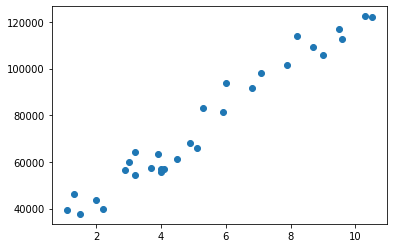

In [1388]:
dataset = pd.read_csv("./datasets/Salary_Data.csv")
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset = dataset.to_numpy()
X, y = dataset[:,0], dataset[:,1]
plt.scatter(X, y)

In [1389]:
from random import uniform

def create_dataset(n_samples=25, spread=3.0):
    X = np.array([*range(0, n_samples)])
    y = np.zeros(len(X))
    for i in range(len(X)):
        y[i] = X[i] + (uniform(-spread, spread))
    return X, y
#X, y = create_dataset(50, 5)
#plt.scatter(X, y)

In [1390]:
m = len(y)

def predict(h0, h1, x):
    return h0+h1*x

def predictions(h0, h1):
    preds = np.zeros(m)
    for i in range(m):
        preds[i] = predict(h0, h1, X[i])
    return preds

def cost_function(h0, h1):
    preds = predictions(h0, h1)
    costs = np.zeros(m)
    for i in range(m):
        costs[i] = (preds[i]-y[i])**2
    return (1/(2*m))*np.sum(costs)

def derive(h0, h1):
    H = 0.0000001
    a = cost_function(h0+H, h1+H)-cost_function(h0, h1)
    return a/H

100%|██████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 4101.73it/s]

min 21318341.397563685


(19571.505908966064, 10836.265896558762)

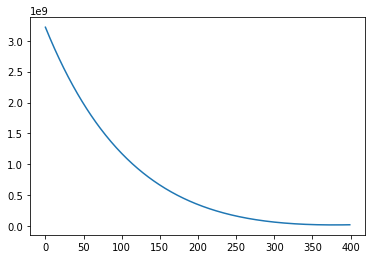

In [1398]:
learning_rate = 0.0001
n_epochs = 400

weight0 = 5
weight1 = 5


losses = []
for epoch in (t := trange(n_epochs)):
    
    temp0 = weight0-derive(weight0, 0)*learning_rate
    temp1 = weight1-derive(0, weight1)*learning_rate
    weight0 = temp0
    weight1 = temp1
    losses.append(cost_function(weight0, weight1))

print('min', min(losses))
plt.plot(losses)
weight0, weight1

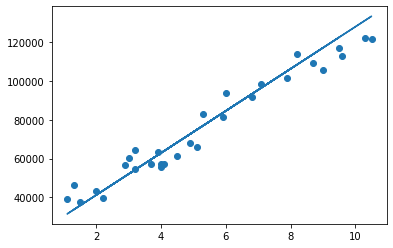

In [1399]:
plt.scatter(X, y)
plt.plot(X, predictions(weight0, weight1))